In [2]:
import pandas as pd
df = pd.read_excel("../data/raw/default_of_credit_card_clients.xls")

In [3]:
df.shape

(30001, 25)

In [4]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
df.columns = df.iloc[0]
df.drop(index = 0, inplace = True)
df.reset_index(drop = True)
df.columns = df.columns.str.lower()

In [7]:
df['default'] = df['default payment next month']
df.drop(columns = ['default payment next month'], inplace = True)
df['default'].value_counts() #target is imbalanced

default
0    23364
1     6636
Name: count, dtype: int64

In [8]:
df.drop(columns = ['id'], inplace = True)

In [9]:
X = df.drop(columns = ['default'])
y = df['default']

Feature Categories-

1. __Demographics__: sex, education, marriage, age 
2. __Credit info__: limit_bal
3. __Payment status__: pay_0 to pay_6
4. __Bill amounts__: bill_amt1 to bill_amt6
5. __Payment amounts__: pay_amt1 to pay_amt6

In [10]:
X.isnull().sum().sort_values(ascending = False)

0
limit_bal    0
bill_amt2    0
pay_amt5     0
pay_amt4     0
pay_amt3     0
pay_amt2     0
pay_amt1     0
bill_amt6    0
bill_amt5    0
bill_amt4    0
bill_amt3    0
bill_amt1    0
sex          0
pay_6        0
pay_5        0
pay_4        0
pay_3        0
pay_2        0
pay_0        0
age          0
marriage     0
education    0
pay_amt6     0
dtype: int64

__No missing values found__

In [11]:
y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: object

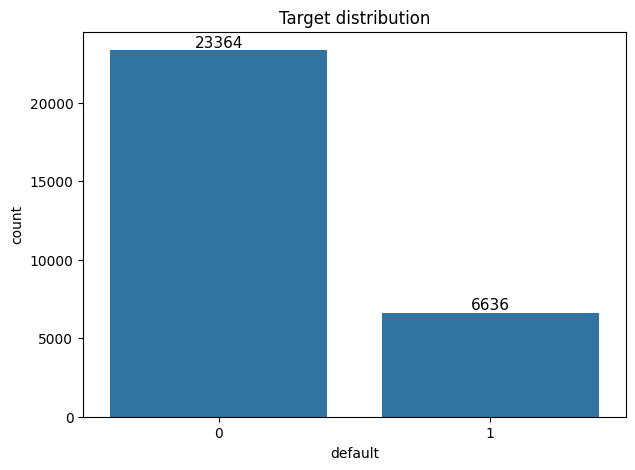

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7, 5))
ax = sns.countplot(x = y)

for container in ax.containers:
    ax.bar_label(container, fontsize = 11)

ax.set_title("Target Distribution", fontsize = 16, fontweight = 'bold')

plt.title("Target distribution")
plt.show()

- __pay_0 to pay_6__
    - pay_x (x!=1) : credit card amount due on xth month is delayed by how many months 
    - -1, 0 = paid duly
    - 1, 2, 3,...n = payment delayed by n months
- __bill_amt1, to bill_amt6__
    - bill_amtx = bill statements of x months ago
- __pay_amt1 to pay_amt6__
    - pay_amtx = actual amount paid in x months ago
- __limit_bal__
    - limit balance of credit card

In [13]:
X['credit_utilization'] = (X[['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].mean(axis = 1) / X['limit_bal'])

In [14]:
X['avg_payment_delay'] = X[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].mean(axis = 1)

In [15]:
eps = 1e-6
X["payment_to_bill_ratio"] = X[["pay_amt1","pay_amt2","pay_amt3","pay_amt4","pay_amt5","pay_amt6"]].sum(axis=1)/(X[["bill_amt1","bill_amt2","bill_amt3","bill_amt4","bill_amt5","bill_amt6"]].sum(axis=1)+eps)

In [16]:
X['no_outstanding_bill'] = (X[['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].sum() == 0).astype(int)

In [17]:
(X['no_outstanding_bill'] == 1).sum()

np.int64(0)

In [18]:
#no person with 0 bill statements over all months

In [19]:
X.drop(columns = ['no_outstanding_bill'], inplace = True)

In [20]:
X

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,credit_utilization,avg_payment_delay,payment_to_bill_ratio
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,0.0642,-0.333333,0.089434
2,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,0.023718,0.5,0.292791
3,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0.188246,0.0,0.108388
4,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0.771113,0.0,0.036259
5,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0.364463,-0.333333,0.540054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0.549507,0.0,0.058661
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,0,1837,3526,8998,129,0,0,0.023536,-0.666667,0.684071
29998,30000,1,2,2,37,4,3,2,-1,0,...,19357,0,0,22000,4200,2000,3100,0.391644,1.333333,0.443997
29999,80000,1,3,1,41,1,-1,0,0,0,...,48944,85900,3409,1178,1926,52964,1804,0.55544,-0.166667,0.552044


In [21]:
corr = X.corrwith(y).sort_values(ascending = False, key = abs)
print(corr)

0
pay_0                    0.324794
avg_payment_delay        0.281955
pay_2                    0.263551
pay_3                    0.235253
pay_4                    0.216614
pay_5                    0.204149
pay_6                    0.186866
limit_bal               -0.153520
credit_utilization       0.115483
pay_amt1                -0.072929
pay_amt2                -0.058579
pay_amt4                -0.056827
pay_amt3                -0.056250
pay_amt5                -0.055124
pay_amt6                -0.053183
sex                     -0.039961
education                0.028006
marriage                -0.024339
bill_amt1               -0.019644
bill_amt2               -0.014193
bill_amt3               -0.014076
age                      0.013890
bill_amt4               -0.010156
payment_to_bill_ratio   -0.006822
bill_amt5               -0.006760
bill_amt6               -0.005372
dtype: float64


__Payment delay features are dominating the risk of default__

In [22]:
processed = X.copy()
processed['Target'] = y
processed.to_csv('../data/processed/credit_processed.csv',index = False)

In [23]:
X.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'credit_utilization', 'avg_payment_delay', 'payment_to_bill_ratio'],
      dtype='object', name=0)